In [2]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

#from matplotlib import mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import numpy as np

#This is the sensor model library
import models as sm

sm = reload(sm) #Reload it every time this cell is run (for when changes are made)

Populating the interactive namespace from numpy and matplotlib


In [5]:
# For each class of files, generate a general file name with placeholders for the number and inserting 'cap' or 'con'

#Water concentration data
'''airFileName = "22March/air%d%s.csv"
water00FileName = "28March/DI-Water/DI_water%d%s.csv"
water10FileName = "28March/NaCl-10/NaCl_10%d%s.csv"
water20FileName = "28March/NaCl-20/NaCl_20%d%s.csv"
water30FileName = "28March/NaCl-30/NaCl_30%d%s.csv"
water40FileName = "28March/NaCl-40/NaCl_40%d%s.csv"
water50FileName = "28March/NaCl-50/NaCl_50%d%s.csv"'''

#Coaxial measurements of the cancerous uterus
uterusFileName = "uterus_coax/%s%d.csv"
uterusBFileName = "uterus_other/B%s%d.csv"

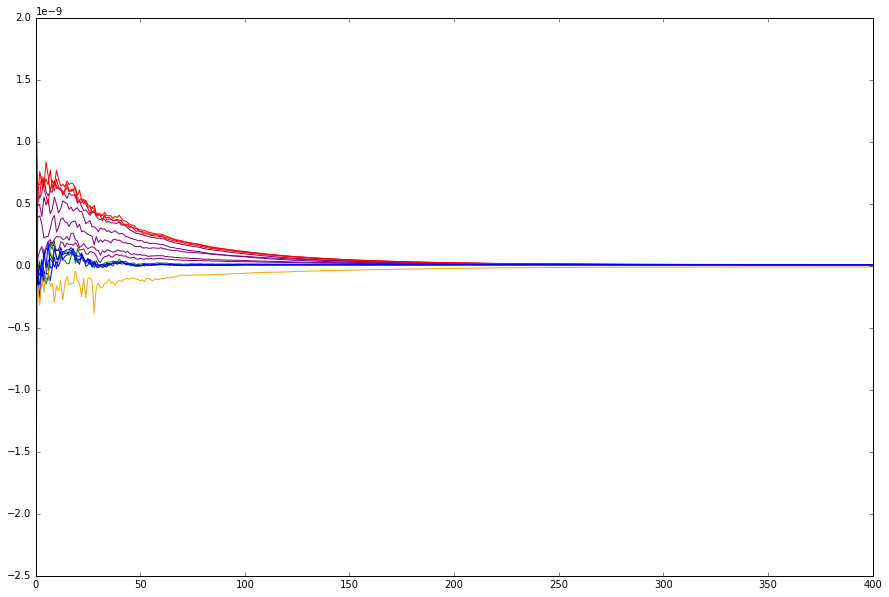

In [56]:
#Plot one intersection of one sweep from each class, just to get a sense of how the data looks

m = 401
X = range(m)

capcon = 'cap'

af = file(uterusFileName%(capcon,6),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'green')
af.close()

af = file(uterusFileName%(capcon,23),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'green')
af.close()


af = file(uterusFileName%(capcon,11),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(uterusFileName%(capcon,14),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(uterusFileName%(capcon,15),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(uterusFileName%(capcon,25),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(uterusFileName%(capcon,28),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()


af = file(uterusFileName%(capcon,2),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'red')
af.close()

af = file(uterusFileName%(capcon,3),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'red')
af.close()

af = file(uterusFileName%(capcon,13),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'red')
af.close()


af = file(uterusFileName%(capcon,4),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()

af = file(uterusFileName%(capcon,5),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()

af = file(uterusFileName%(capcon,10),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()


af = file(uterusBFileName%(capcon,1),'r')
dat = [float(i) for i in af.readline().split(',')]
#dat = [np.log(np.abs(float(i))) for i in af.readline().split(',')]
plt.plot(X,dat,'orange')
af.close()


plt.show()

In [335]:
#Initialize a model for each class

print "Initializing models..."

order = 5
num = 30

normalModel = [sm.Model(order,'healthy') for i in range(num)]
cancerModel = [sm.Model(order,'cancer') for i in range(num)]

Initializing models...


In [336]:
# Initialize arrays of sweeps, one for each known class

print "Opening data..."

subSize = 1 #Size of the data matrices (the whole thing is 8x8, but using a subset of the data makes everything faster)

testingData = []

cancer_indices = set([4,5,9,10])
throwaway = set([6,11,14,15,17,23,25,28])
for ind in range(1,num+1):
    test_index = set([ind])
    normalData = [sm.Sweep(uterusFileName%('%s',i),subSize) for i in list(set(range(1,31))-cancer_indices-test_index-throwaway)]
    cancerData = [sm.Sweep(uterusFileName%('%s',i),subSize) for i in list(cancer_indices-test_index-throwaway)]

    #Initialize an array of test sweeps
    testingData.append([sm.Sweep(uterusFileName%('%s',list(test_index)[0]),subSize)])

    #Train each model

    print "Training models..."

    normalModel[ind-1].train(normalData)
    cancerModel[ind-1].train(cancerData)

    #Test the testing array with each model

    print "Testing %d..."%ind

    print "Testing normal model %d..."%ind
    normalModel[ind-1].test(testingData[-1])

    print "Testing cancer model %d..."%ind
    cancerModel[ind-1].test(testingData[-1])

Opening data...
Training models...
Training healthy model...
Training cancer model...
Testing 1...
Testing normal model 1...
Testing cancer model 1...
Training models...
Training healthy model...
Training cancer model...
Testing 2...
Testing normal model 2...
Testing cancer model 2...
Training models...
Training healthy model...
Training cancer model...
Testing 3...
Testing normal model 3...
Testing cancer model 3...
Training models...
Training healthy model...
Training cancer model...
Testing 4...
Testing normal model 4...
Testing cancer model 4...
Training models...
Training healthy model...
Training cancer model...
Testing 5...
Testing normal model 5...
Testing cancer model 5...
Training models...
Training healthy model...
Training cancer model...
Testing 6...
Testing normal model 6...
Testing cancer model 6...
Training models...
Training healthy model...
Training cancer model...
Testing 7...
Testing normal model 7...
Testing cancer model 7...
Training models...
Training healthy mod

1 - 99.8% healthy
2 - 100.0% healthy
3 - 100.0% healthy
4 - 92.3% cancer
5 - 92.2% cancer
6 - 90.6% cancer
7 - 99.6% healthy
8 - 99.7% healthy
9 - 86.7% cancer
10 - 92.2% cancer
11 - 70.8% healthy
12 - 97.5% healthy
13 - 100.0% healthy
14 - 87.2% healthy
15 - 60.6% cancer
16 - 99.2% healthy
17 - 95.7% healthy
18 - 99.9% healthy
19 - 99.7% healthy
20 - 98.2% healthy
21 - 98.6% healthy
22 - 97.7% healthy
23 - 93.8% cancer
24 - 99.3% healthy
25 - 86.8% healthy
26 - 99.1% healthy
27 - 99.7% healthy
28 - 89.1% healthy
29 - 99.9% healthy
30 - 98.5% healthy


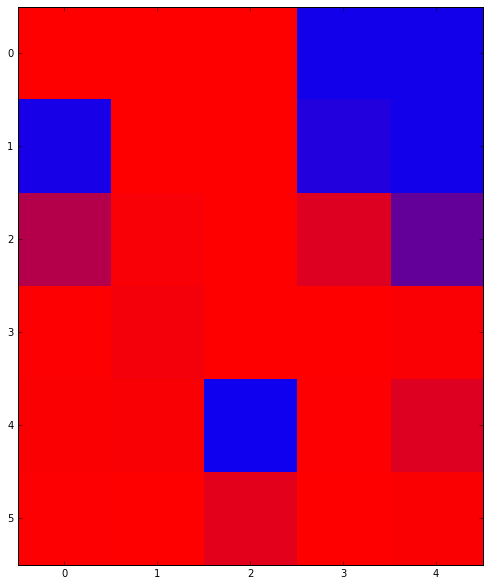

In [337]:
zval = []
tmp = []

for ind in range(num):
    cls = testingData[ind][0].genClass()[0][0]
    if cls == "healthy":
        prob = testingData[ind][0].likelihoods[0][0][0]/sum(testingData[ind][0].likelihoods[0][0])
    else:
        prob = 1 - testingData[ind][0].likelihoods[0][0][0]/sum(testingData[ind][0].likelihoods[0][0])
    print "%d - %.1f%% %s"%(ind+1,100*prob,cls)
    #print "%.3f"%prob

    tmp.append([
            testingData[ind][0].likelihoods[0][0][0]/sum(testingData[ind][0].likelihoods[0][0]),
            0,
            1 - testingData[ind][0].likelihoods[0][0][0]/sum(testingData[ind][0].likelihoods[0][0])
    ])

    if (ind+1)%5 == 0:
        zval.append(tmp)
        tmp = []

#print zval

# tell imshow about color map so that only set colors are used
img = pyplot.imshow(zval,interpolation='nearest')

#plt.legend(handles=[
#    mpat.Patch(color='red', label='Air'),
#    mpat.Patch(color='blue', label='Aluminum')
#],loc="upper left", bbox_to_anchor=(1,1))

plt.show()

In [ ]:
#Generate 'average' plots of the data from each model

m = 401
X = range(m)

T = X[m-1]-X[0]
w = (2*3.1415926535)/T

d = 1

avg = []
for n in range(-order,order+1):
    avg.append(np.average([normalData[t].c(n,0,0) for t in range(len(normalData))]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'red')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([cancerData[t].c(n,0,0) for t in range(len(cancerData))]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'blue')

'''avg = []
for n in range(-order,order+1):
    avg.append(np.average([water00Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'orange')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water10Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'yellow')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water20Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'green')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water30Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'blue')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water40Data[t].c(n,0,0) for t in range(4)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'purple')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water50Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'black')'''


plt.show()